In [2]:
import numpy as np
import tensorflow as tf

from modules.dataloader import DataLoader
from modules.embedding_extractor import EmbeddingExtractor

In [3]:
data_loader = DataLoader("raw-img")
dataset = data_loader.load_data()

Found 3363 files belonging to 5 classes.


In [4]:
data_loader.plot_dataset()

<IPython.core.display.Javascript object>

In [5]:
embeddings_list = []
labels_list = []

num_batches = tf.data.experimental.cardinality(dataset).numpy()

embedding_extractor = EmbeddingExtractor('resnet50')

i = 1

for batch, labels in dataset:

    print(f"Processing batch {i}/{num_batches}...")
    
    batch_embeddings = embedding_extractor.extract_embeddings(batch)

    embeddings_list.append(batch_embeddings)
    labels_list.append(labels.numpy())  # converte os labels para numpy
    i += 1


Processing batch 1/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Processing batch 2/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 3/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 4/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 5/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 6/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 7/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 8/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 9/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 10/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 11/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 12/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 13/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 14/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 15/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing batch 16/106...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
P

In [16]:
embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)

In [17]:
import pandas as pd

embeddings_df = pd.DataFrame(embeddings_array)
embeddings_df['label'] = labels_array


In [35]:
df = embeddings_df[embeddings_df["label"].isin([0,1,2,3,4])]
df.to_csv("embeddings.csv", index=False)

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

df = pd.read_csv("embeddings.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,4.739536e-10,3.865654e-11,1.680820e-10,1.374871e-10,4.867203e-11,4.142138e-09,1.565625e-09,5.632677e-10,5.958704e-11,6.369567e-08,...,1.798661e-10,2.016630e-10,7.096924e-11,1.480334e-10,5.260149e-09,2.867238e-10,8.362141e-11,6.580800e-09,8.805957e-11,2
1,1.983167e-08,4.738690e-07,9.082426e-08,6.195143e-08,1.120312e-07,7.927082e-07,4.962134e-08,7.249858e-07,2.646192e-07,2.000062e-07,...,7.663985e-08,1.917106e-08,5.369974e-08,3.977123e-08,5.823314e-07,2.629729e-07,3.536078e-08,1.377382e-07,6.655402e-07,0
2,2.406609e-09,1.197043e-09,1.596766e-09,5.069751e-09,2.166209e-09,1.726241e-07,4.180258e-09,1.507559e-02,9.841749e-01,1.124169e-06,...,3.924288e-08,3.781493e-09,2.935531e-06,5.679948e-07,6.650110e-08,3.557157e-07,3.449314e-08,1.819728e-08,7.055804e-09,3
3,1.304485e-06,9.879804e-09,2.682871e-07,5.162985e-06,2.813365e-07,3.478358e-06,5.012574e-07,1.006174e-06,4.358066e-07,7.780603e-06,...,5.205575e-07,2.003143e-08,8.070794e-07,1.513716e-07,8.720646e-08,2.486943e-07,8.824986e-09,4.392356e-07,3.207620e-08,2
4,7.716769e-07,2.445663e-07,1.487069e-07,1.959915e-06,8.165861e-08,4.147855e-06,3.843136e-06,1.914405e-05,7.653606e-07,4.238163e-04,...,5.429774e-06,9.361479e-07,1.245102e-05,4.913412e-06,3.398279e-05,4.187988e-06,3.360979e-07,4.571245e-05,1.700708e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,8.569089e-08,4.907115e-10,1.262781e-09,2.040826e-08,2.059776e-09,5.838650e-09,6.947306e-10,4.073541e-08,1.222815e-08,7.186065e-06,...,1.786086e-09,5.843371e-10,4.067523e-09,3.850231e-09,2.710424e-08,2.230954e-09,2.218109e-10,1.843824e-08,1.467923e-09,2
3359,6.789912e-07,8.690105e-09,3.101000e-07,8.887933e-07,4.068725e-06,4.047801e-07,3.068898e-06,9.455726e-05,5.310139e-05,1.194451e-05,...,3.024692e-08,1.901401e-08,1.207980e-07,7.518163e-07,2.453454e-08,2.795475e-07,7.433966e-08,1.488645e-06,2.107477e-07,2
3360,7.624241e-07,4.720775e-09,1.342629e-07,1.604810e-08,3.087641e-08,2.992425e-07,2.469851e-08,7.427306e-08,2.092939e-08,4.770465e-06,...,3.681387e-08,5.961746e-08,2.335845e-08,1.308075e-08,7.683286e-08,3.131153e-08,4.372445e-09,1.833895e-07,2.443424e-08,2
3361,8.817597e-10,1.888726e-08,1.696025e-07,7.707225e-08,2.932144e-07,1.602996e-08,1.614397e-09,1.992102e-07,8.217940e-08,2.078641e-08,...,2.979578e-08,1.117306e-08,8.396307e-09,9.479633e-08,1.310867e-07,2.633374e-08,8.216697e-09,2.396974e-07,3.621550e-07,0


In [2]:
df_features = df.drop(columns=["label"])
X_train, X_test, y_train, y_test = train_test_split(df_features, df["label"], test_size=0.3, stratify=df["label"], random_state=42)

In [3]:
colo = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple'}
colors = [colo[label] for label in y_train]

In [4]:
scaler = MinMaxScaler()
embeddings_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=3)
pca_emb = pca.fit_transform(X_train)

In [5]:
legenda = {"cachorro": 'red', "cavalo": 'blue', "elefante": 'green', "galinha": 'orange', "gato": 'purple'}

C:\Users\Maria Luiza\AppData\Local\Temp\ipykernel_14220\2188432213.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_emb[:, 0], pca_emb[:, 1], color = colors,  cmap='viridis', s=10)


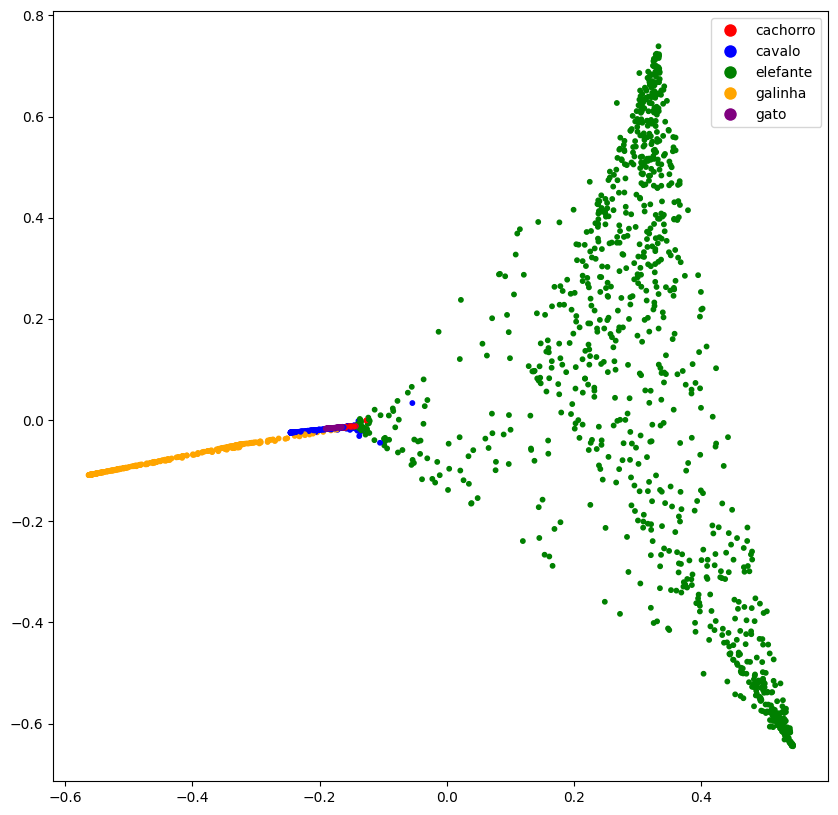

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.scatter(pca_emb[:, 0], pca_emb[:, 1], color = colors,  cmap='viridis', s=10)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'{label}', markerfacecolor=color, markersize=10) for label, color in legenda.items()])

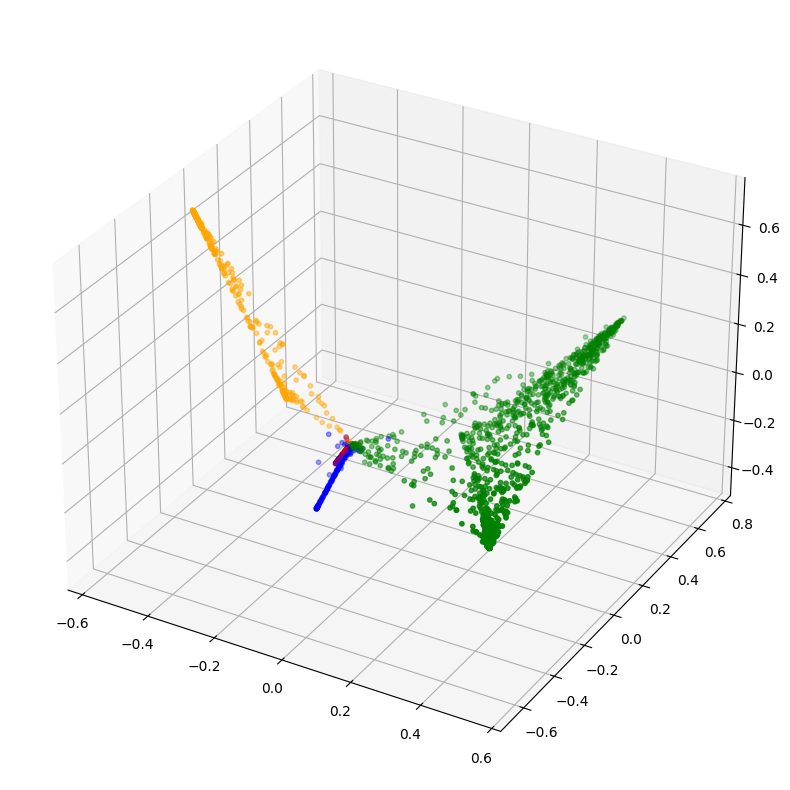

In [7]:

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_emb[:, 0], pca_emb[:, 1], pca_emb[:, 2], s=10, color=colors)

plt.show()
